In [7]:
import os
import pickle

# tfidf is term frequency/inverse document frequency. 
# it's a pretty good coarse metric for importance of a term in a document.
from sklearn.feature_extraction.text import TfidfVectorizer

prefix = './article_pickles/'
content = [pickle.load(open(prefix + fname, 'rb')) for fname in sorted(os.listdir(prefix))]
content = [' '.join(ls) for ls in content]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(content)

In [23]:
feature_names_to_idx = {}
for idx, k in enumerate(vectorizer.get_feature_names()):
    feature_names_to_idx[k] = idx
    
def get_feature_importance_ts(word):
    if word in feature_names_to_idx:
        idx = feature_names_to_idx[word]
        return [X[r, idx] for r in range(X.shape[0])]

In [12]:
%matplotlib inline
import datetime as dt 
dts = [dt.datetime.strptime(i[:18], '%Y-%m-%dT%H:%M:%S') for i in sorted(os.listdir(prefix))]

Text(0.5, 1.0, 'custody')

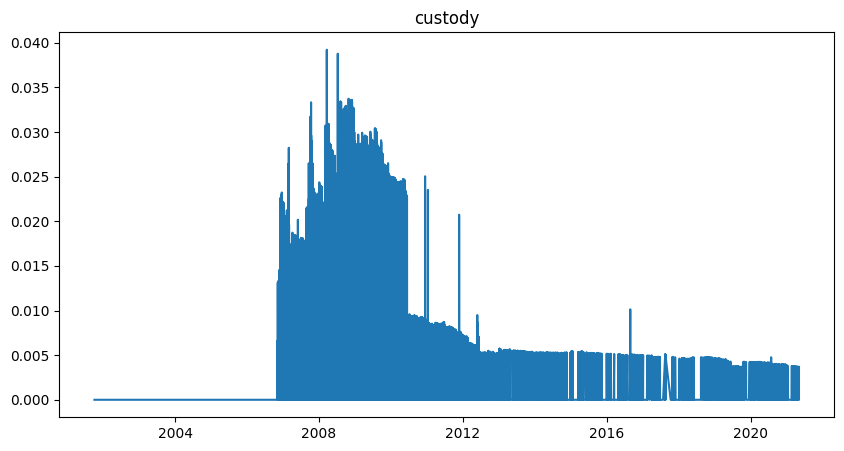

In [134]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(dts, get_feature_importance_ts('custody'))
plt.title('custody')

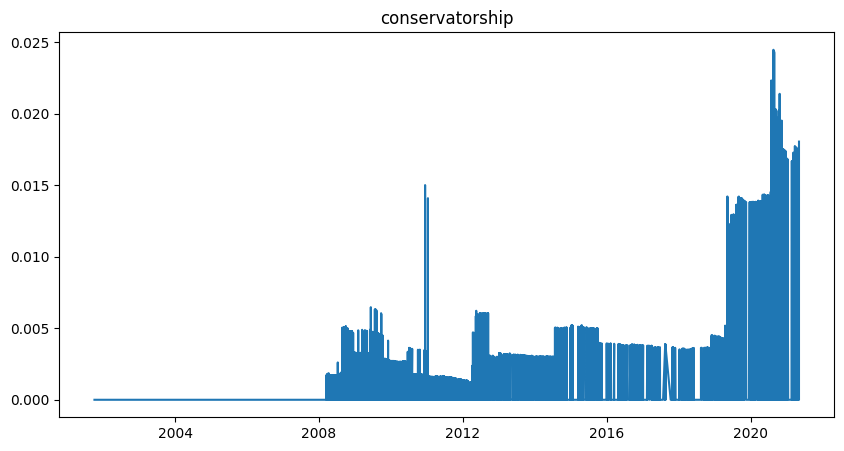

In [135]:
plt.title('conservatorship')
plt.plot(dts, get_feature_importance_ts('conservatorship'))


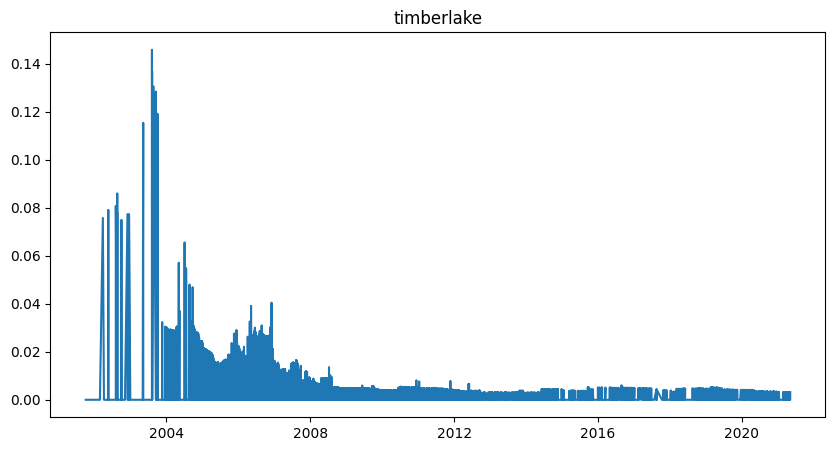

In [136]:
plt.title('timberlake')
plt.plot(dts, get_feature_importance_ts('timberlake'))

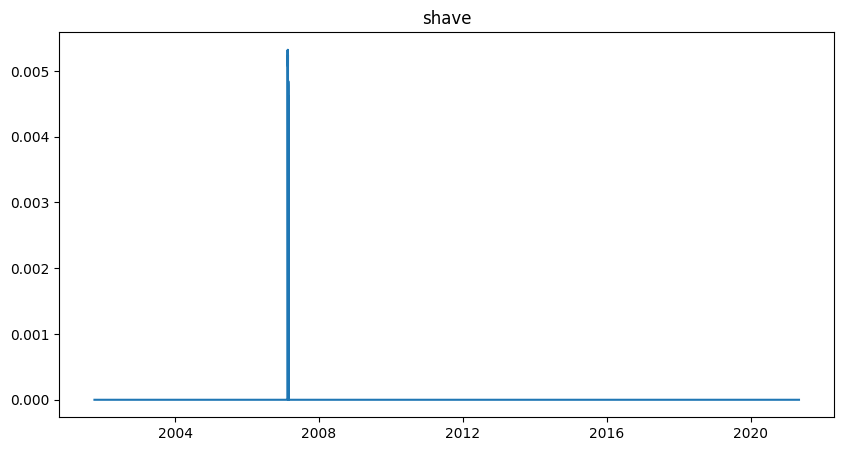

In [138]:
plt.title('shave')
plt.plot(dts, get_feature_importance_ts('shave'))

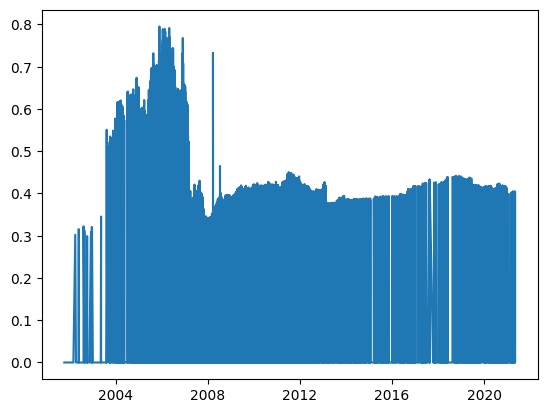

In [34]:
plt.plot(dts, get_feature_importance_ts('spears'))

In [39]:
import pywikibot

site = pywikibot.Site("en", "wikipedia")
page = pywikibot.Page(site, "Britney Spears")

In [47]:
[p for p in page.linkedPages()]

[Page("(I Can't Get No) Satisfaction"),
 Page('(You Drive Me) Crazy'),
 Page('(You Drive Me) Crazy Tour'),
 Page('...Baby One More Time (album)'),
 Page('...Baby One More Time (song)'),
 Page('...Baby One More Time Tour'),
 Page('15 Minutes (Barry Manilow album)'),
 Page('2000 MTV Video Music Awards'),
 Page('2001 MTV Video Music Awards'),
 Page('2003 MTV Video Music Awards'),
 Page('2007 MTV Video Music Awards'),
 Page('2008 MTV Europe Music Awards'),
 Page('2008 MTV Video Music Awards'),
 Page('2011 England riots'),
 Page('2011 MTV Video Music Awards'),
 Page('2015 Billboard Music Awards'),
 Page('2015 Teen Choice Awards'),
 Page('2016 Billboard Music Awards'),
 Page('2016 MTV Video Music Awards'),
 Page('2017 Radio Disney Music Awards'),
 Page('3 (Britney Spears song)'),
 Page("40th People's Choice Awards"),
 Page("43rd People's Choice Awards"),
 Page('5150 (involuntary psychiatric hold)'),
 Page('5 Seconds of Summer'),
 Page('A&E Television Networks'),
 Page('ABC News'),
 Page('A L

In [60]:
# todo:
# pull tag metadata (citation needed; bias; point of view) --> npov (neutral point of view violation)
# look at flags (esp npov) & pull out specifically flagged text (flagged text NOT the edit)
# look at edit descriptions

-1

In [63]:
import gzip
rev_metadata = pickle.load(gzip.open('pickles/rev_metadata.pkl.gz'))
    

In [74]:
import pandas as pd
df = pd.DataFrame(rev_metadata)

74449.2457958016
49631.05469886643


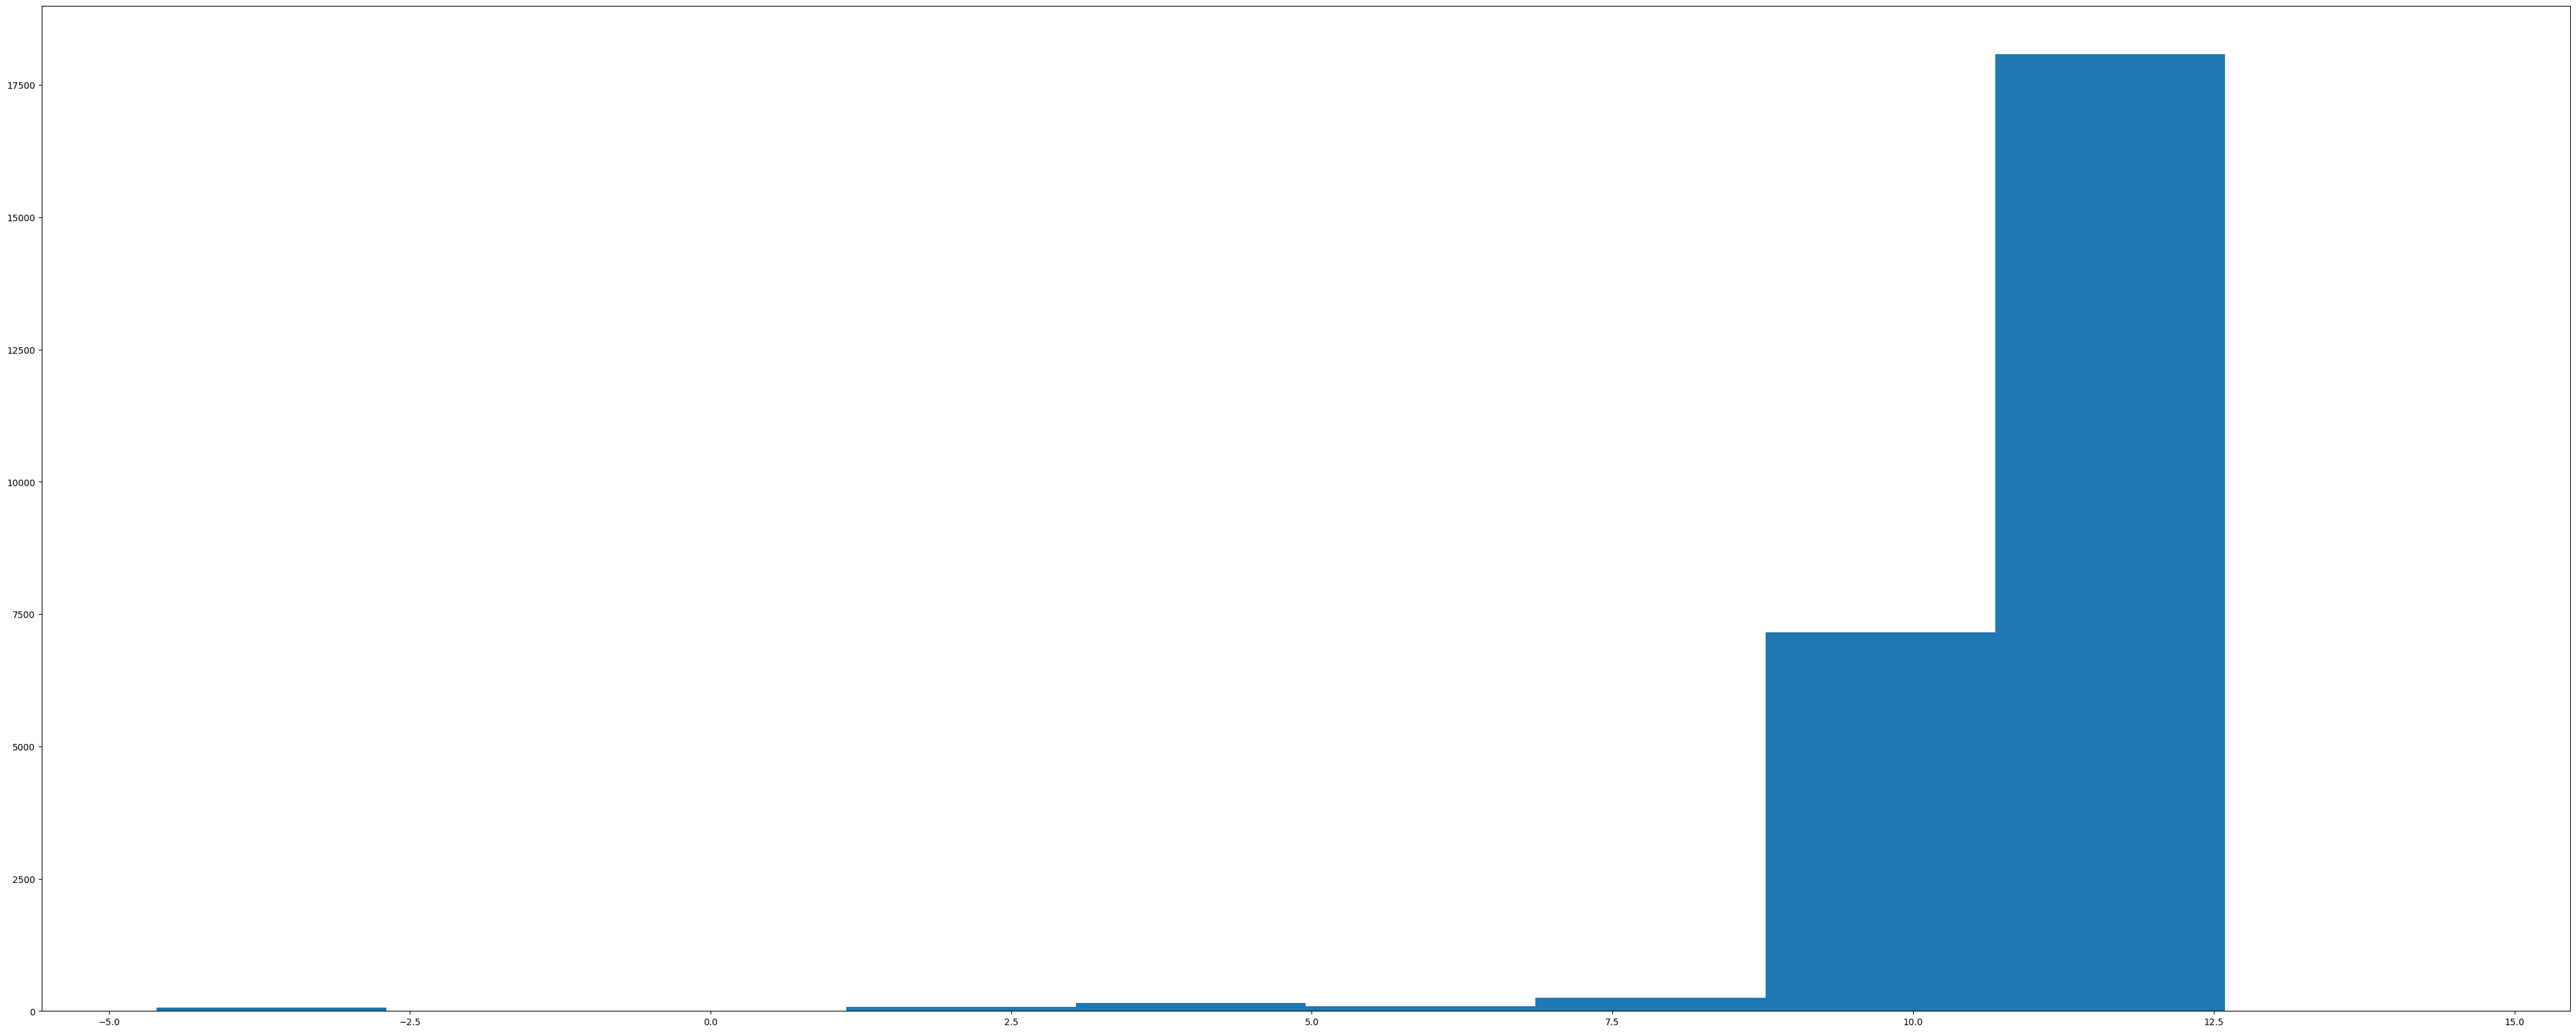

In [162]:
plt.hist(np.log(df['size'] + 0.01))
print(np.mean(df['size']))
print(np.std(df['size']))

In [100]:
df['month_plus_year'] = df['timestamp'].dt.month.astype('str') + df['timestamp'].dt.year.astype('str')

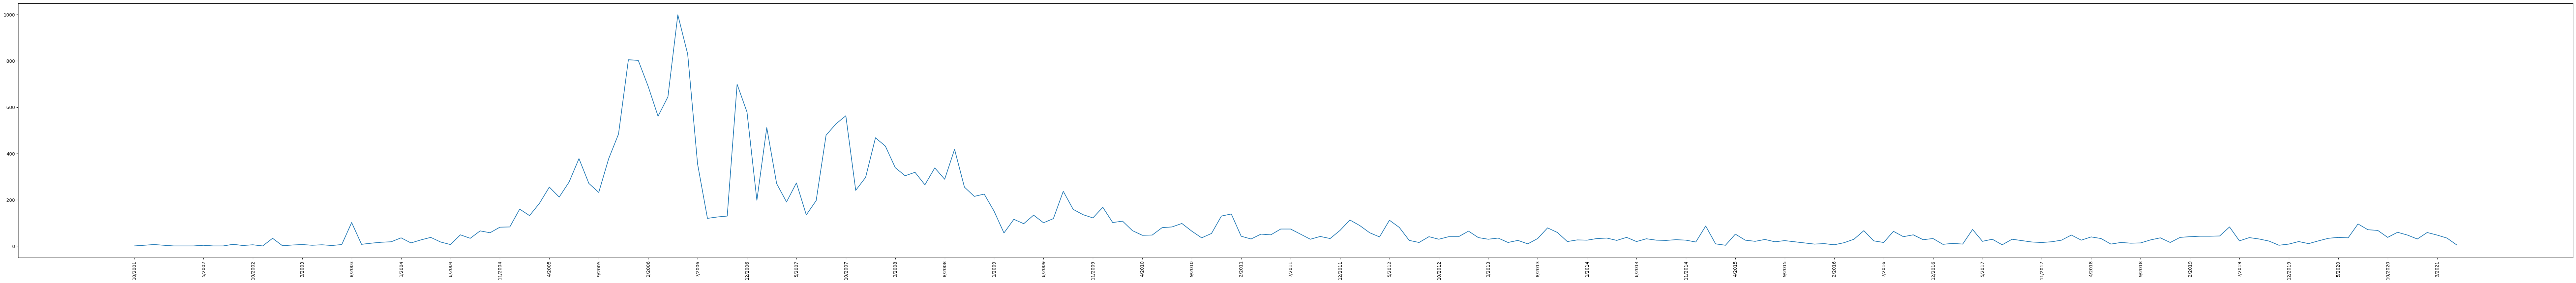

In [105]:
mos_since_inception = []
counts = []
mo_labels = []

for mo_plus_year, gr in df.groupby('month_plus_year'):
    mo = int(mo_plus_year[:-4])
    year = int(mo_plus_year[-4:])
    mo_labels.append(str(mo) + '/' + str(year))
    mo_count = ((year - 2000) * 12) + mo
    mos_since_inception.append(mo_count)
    counts.append(len(gr))
    
a = [(ml, mi, co) for ml, mi, co in zip(mo_labels, mos_since_inception, counts)]
a = sorted(a, key=lambda b: b[1])
mos_since_inception = [aa[1] for aa in a]
mo_labels = [aa[0] for aa in a]
counts = [aa[2] for aa in a]
import matplotlib.pyplot as plot
plt.rcParams["figure.figsize"] = (100,10)
plt.xticks(mos_since_inception[::5], mo_labels[::5], rotation='vertical')
plt.plot(mos_since_inception, counts)


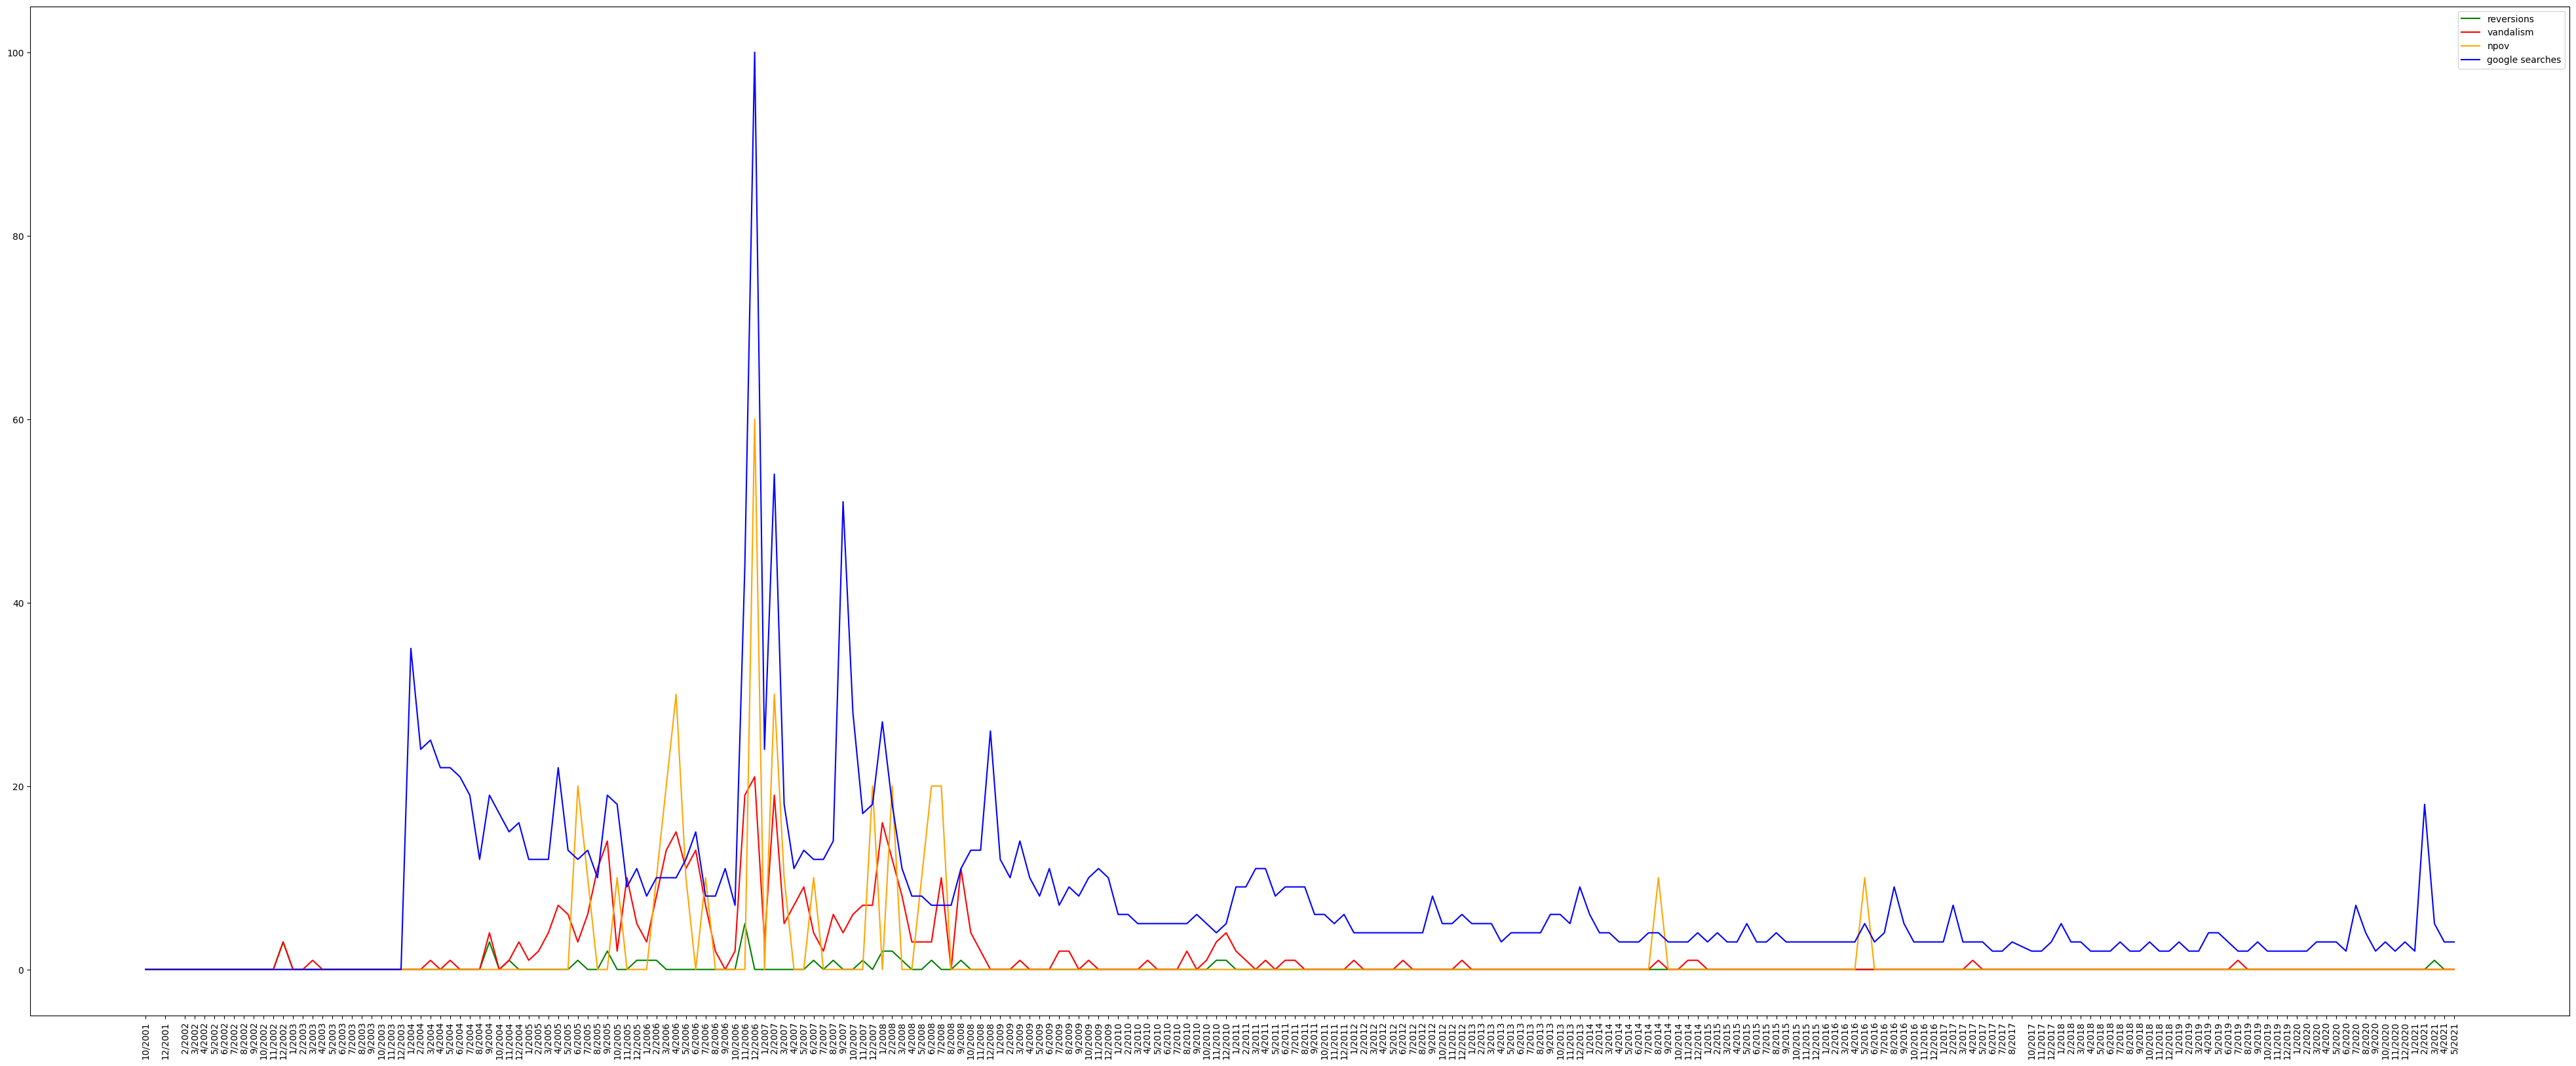

In [149]:
import numpy as np
df['reversions'] = df['comment'].apply(lambda b: 'reverting' in b)
df['vandalism'] = df['comment'].apply(lambda b: 'vandalism' in b)
mos_since_inception = []
reversions = []
vandalism = []
npov = []
mo_labels = []

for mo_plus_year, gr in df.groupby('month_plus_year'):
    mo = int(mo_plus_year[:-4])
    year = int(mo_plus_year[-4:])
    mo_labels.append(str(mo) + '/' + str(year))
    mo_count = ((year - 2000) * 12) + mo
    mos_since_inception.append(mo_count)
    reversions.append(np.sum(gr['reversions']))
    vandalism.append(np.sum(gr['vandalism']))
    npov.append(np.sum(gr['npov_flag']) * 10)
    
a = [(ml, mi, re, van, np) for ml, mi, re, van, np in zip(mo_labels, mos_since_inception, reversions, vandalism, npov)]
a = sorted(a, key=lambda b: b[1])
mos_since_inception = [aa[1] for aa in a]
mo_labels = [aa[0] for aa in a]
reversions = [aa[2] for aa in a]
vandalism = [aa[3] for aa in a]
npov = [aa[4] for aa in a]
import matplotlib.pyplot as plot
plt.rcParams["figure.figsize"] = (50,20)
plt.xticks(mos_since_inception, mo_labels, rotation='vertical')
plt.plot(mos_since_inception, reversions, color='green', label='reversions')
plt.plot(mos_since_inception, vandalism, color='red', label='vandalism')
plt.plot(mos_since_inception, npov, color='orange', label='npov')
goog_searches = []
for ml, mi in zip(mo_labels, mos_since_inception):
    if ml in set(goog['month_str']):
        goog_searches.append(int(goog[goog['month_str']==ml]['Category: All categories'][0]))
    elif '0' + ml in set(goog['month_str']):
        goog_searches.append(int(goog[goog['month_str']=='0' + ml]['Category: All categories'][0]))

    else:
        goog_searches.append(0)
        
plt.plot(mos_since_inception, goog_searches, color='blue', label='google searches')
plt.legend()
plt.show()

In [145]:
df['npov_flag'] = df['comment'].apply(lambda b: 'NPOV' in b or 'npov' in b)
df[df['npov_flag']][['comment', 'timestamp', 'user', 'size']].to_csv('npov_flag_comments_and_edits.csv')
# with open('npov_comments.txt')
# [c for c in df['comment'] if 'NPOV' in c]

In [155]:
npov_flagged_dates = pd.to_datetime(df[df['npov_flag']]['timestamp'])
npov_flagged_days = set()
for ts in npov_flagged_dates:
    one_day_ago = ts - pd.Timedelta(days=1)
    one_day_after = ts + pd.Timedelta(days=1)
    for my_ts in [ts, one_day_ago, one_day_after]:
        npov_flagged_days.add(my_ts.strftime('%Y%m%d'))
        
df['Ymd'] = pd.to_datetime(df['timestamp']).apply(lambda b: b.strftime('%Y%m%d'))
df['npov_flag_proximate'] = df['Ymd'].apply(lambda b: b in npov_flagged_days)


npov_proximate_edits = df[df['npov_flag_proximate']][['timestamp', 'user', 'size', 'comment']]
npov_proximate_edits.to_csv('npov_proximate_edits.csv')

In [157]:
len(npov_proximate_edits)

1621

In [117]:
goog = pd.read_csv('./britney_google_timeline.csv')
goog

Index(['Category: All categories'], dtype='object')

In [130]:
goog['month_str'] = goog.index.map(lambda b: b[-2:] + '/' + b[:4])
goog

,Category: All categories,month_str
Month,Britney Spears: (United States),th/Mont
2004-01,35,01/2004
2004-02,24,02/2004
2004-03,25,03/2004
2004-04,22,04/2004
...,...,...
2021-01,2,01/2021
2021-02,18,02/2021
2021-03,5,03/2021
2021-04,3,04/2021


In [127]:
goog_searches = []
for ml, mi in zip(mo_labels, mos_since_inception):
    if ml in set(goog['month_str']):
        goog_searches.append(int(goog[goog['month_str']==ml]['Category: All categories'][0]))
    else:
        goog_searches.append(0)

In [126]:
goog_searches

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '17',
 '15',
 '16',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '18',
 '9',
 '11',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '7',
 '44',
 '100',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '28',
 '17',
 '18',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '13',
 '13',
 '26',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '10',
 '11',
 '10',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '5',
 '4',
 '5',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '6',
 '5',
 '6',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '5',
 '5',
 '6',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '6',
 '5',
 '9',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '3',
 '3',
 '4',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '3',
 '3',
 '3',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '3',
 '3',
 '3',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '2',
 '2',
 '3',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '3',
 '2',
 '2',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '2',
 '2',
 '2',
 0,
 0,
 0,
 0,
 0,
 0,

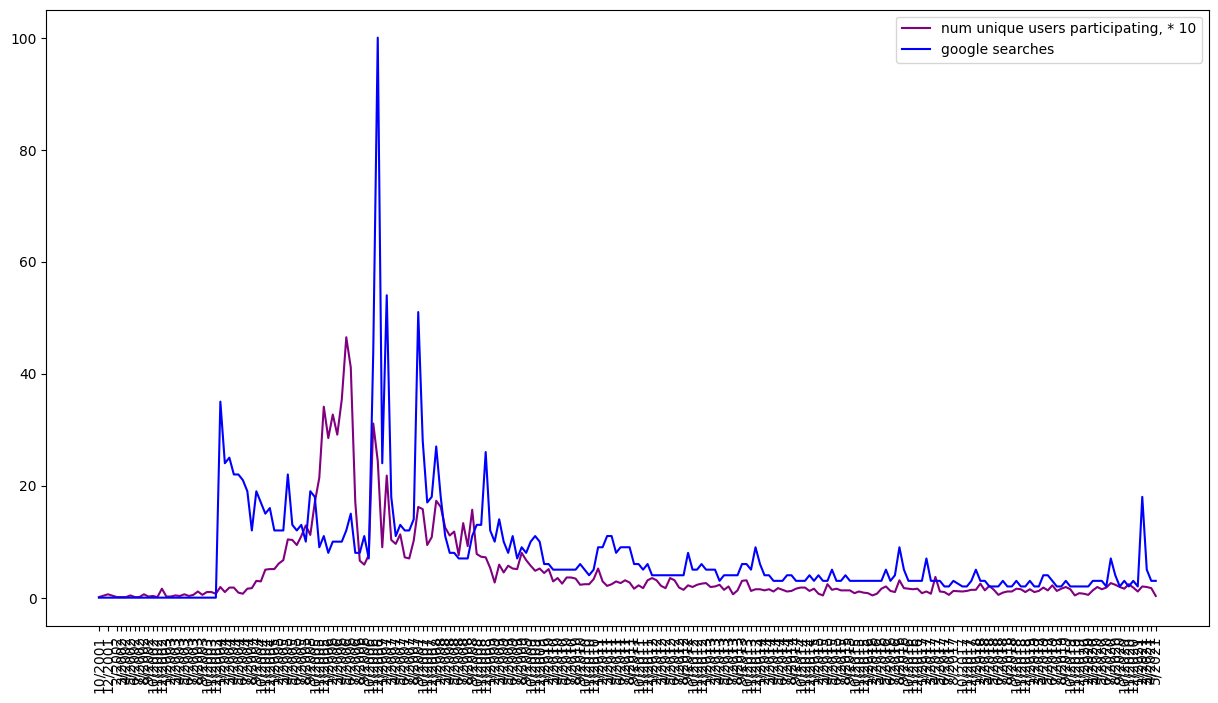

In [172]:
import numpy as np
df['reversions'] = df['comment'].apply(lambda b: 'reverting' in b)
df['vandalism'] = df['comment'].apply(lambda b: 'vandalism' in b)
mos_since_inception = []
reversions = []
vandalism = []
npov = []
mo_labels = []
sizes = []

for mo_plus_year, gr in df.groupby('month_plus_year'):
    mo = int(mo_plus_year[:-4])
    year = int(mo_plus_year[-4:])
    mo_labels.append(str(mo) + '/' + str(year))
    mo_count = ((year - 2000) * 12) + mo
    mos_since_inception.append(mo_count)
    sizes.append(len(set(gr['user'])))
    reversions.append(np.sum(gr['reversions']))
    vandalism.append(np.sum(gr['vandalism']))
    npov.append(np.sum(gr['npov_flag']) * 10)
    
a = [(ml, mi, re, van, np, sz) for ml, mi, re, van, np, sz in zip(mo_labels, mos_since_inception, reversions, vandalism, npov, sizes)]
a = sorted(a, key=lambda b: b[1])
mos_since_inception = [aa[1] for aa in a]
mo_labels = [aa[0] for aa in a]
reversions = [aa[2] for aa in a]
vandalism = [aa[3] for aa in a]
npov = [aa[4] for aa in a]
sizes = [aa[5] for aa in a]
import matplotlib.pyplot as plot
plt.rcParams["figure.figsize"] = (15,8)
plt.xticks(mos_since_inception, mo_labels, rotation='vertical')
# plt.plot(mos_since_inception, reversions, color='green', label='reversions')
# plt.plot(mos_since_inception, vandalism, color='red', label='vandalism')
# plt.plot(mos_since_inception, npov, color='orange', label='npov')
plt.plot(mos_since_inception, [s/10 for s in sizes], color='purple', label='num unique users participating, * 10')

goog_searches = []
for ml, mi in zip(mo_labels, mos_since_inception):
    if ml in set(goog['month_str']):
        goog_searches.append(int(goog[goog['month_str']==ml]['Category: All categories'][0]))
    elif '0' + ml in set(goog['month_str']):
        goog_searches.append(int(goog[goog['month_str']=='0' + ml]['Category: All categories'][0]))

    else:
        goog_searches.append(0)
        
plt.plot(mos_since_inception, goog_searches, color='blue', label='google searches')

plt.legend()
plt.show()